In [6]:
import pandas

In [2]:
import numpy

In [16]:
import matplotlib

In [5]:
import scipy

In [13]:
import pandas 
dataset = pandas.read_csv(r'C:\Users\CHAWALU\Desktop\tag3.csv')
dataset

,73.5071106
0,73.575470
1,73.841309
2,73.727379
3,73.560287
4,73.757767
5,73.815994
6,73.732445
7,73.760292
8,73.805862
9,73.805862


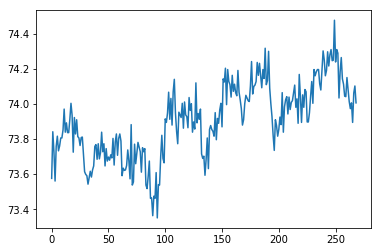

In [17]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv(r'C:\Users\CHAWALU\Desktop\tag3.csv')
plt.plot(dataset)
plt.show()

In [19]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [20]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [22]:
# load the dataset
dataframe = pandas.read_csv(r'C:\Users\CHAWALU\Desktop\tag3.csv')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [23]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [24]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

180 89


In [25]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [28]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [29]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0675
Epoch 2/100
0s - loss: 0.0160
Epoch 3/100
0s - loss: 0.0140
Epoch 4/100
0s - loss: 0.0135
Epoch 5/100
0s - loss: 0.0124
Epoch 6/100
0s - loss: 0.0122
Epoch 7/100
0s - loss: 0.0117
Epoch 8/100
0s - loss: 0.0111
Epoch 9/100
0s - loss: 0.0108
Epoch 10/100
0s - loss: 0.0104
Epoch 11/100
0s - loss: 0.0102
Epoch 12/100
0s - loss: 0.0100
Epoch 13/100
0s - loss: 0.0098
Epoch 14/100
0s - loss: 0.0098
Epoch 15/100
0s - loss: 0.0097
Epoch 16/100
0s - loss: 0.0094
Epoch 17/100
0s - loss: 0.0096
Epoch 18/100
0s - loss: 0.0095
Epoch 19/100
0s - loss: 0.0095
Epoch 20/100
0s - loss: 0.0095
Epoch 21/100
0s - loss: 0.0098
Epoch 22/100
0s - loss: 0.0095
Epoch 23/100
0s - loss: 0.0095
Epoch 24/100
0s - loss: 0.0095
Epoch 25/100
0s - loss: 0.0097
Epoch 26/100
0s - loss: 0.0096
Epoch 27/100
0s - loss: 0.0096
Epoch 28/100
0s - loss: 0.0097
Epoch 29/100
0s - loss: 0.0097
Epoch 30/100
0s - loss: 0.0096
Epoch 31/100
0s - loss: 0.0096
Epoch 32/100
0s - loss: 0.0095
Epoch 33/100
0s -

In [30]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.11 RMSE
Test Score: 0.11 RMSE


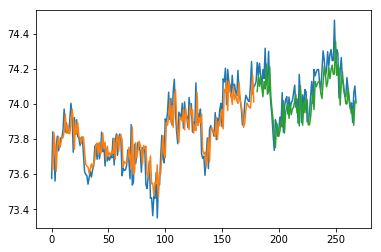

In [31]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
trainPredict

array([[ 73.62786865],
       [ 73.83555603],
       [ 73.74462128],
       [ 73.61655426],
       [ 73.76863861],
       [ 73.81515503],
       [ 73.74861145],
       [ 73.77065277],
       [ 73.80702972],
       [ 73.80702972],
       [ 73.84374237],
       [ 73.9408493 ],
       [ 73.83351898],
       [ 73.87662506],
       [ 73.83146667],
       [ 73.83146667],
       [ 73.89315033],
       [ 73.96793365],
       [ 73.91177368],
       [ 73.74263   ],
       [ 73.90142059],
       [ 73.82534027],
       [ 73.89108276],
       [ 73.81312561],
       [ 73.80702972],
       [ 73.7726593 ],
       [ 73.80905151],
       [ 73.81108856],
       [ 73.72872162],
       [ 73.65647888],
       [ 73.64498138],
       [ 73.63926697],
       [ 73.60343933],
       [ 73.63166046],
       [ 73.65840149],
       [ 73.63356018],
       [ 73.66417694],
       [ 73.68160248],
       [ 73.76863861],
       [ 73.77668762],
       [ 73.71095276],
       [ 73.78071594],
       [ 73.71292114],
       [ 73

In [33]:
testPredict

array([[ 74.07040405],
       [ 74.16030884],
       [ 74.09970093],
       [ 74.15613556],
       [ 74.0976181 ],
       [ 74.04109192],
       [ 74.12689972],
       [ 74.08506012],
       [ 74.22687531],
       [ 74.05575562],
       [ 74.07458496],
       [ 74.21235657],
       [ 74.03899384],
       [ 73.96585083],
       [ 73.90555573],
       [ 73.81922913],
       [ 73.75061035],
       [ 73.89108276],
       [ 73.86427307],
       [ 73.81515503],
       [ 73.84579468],
       [ 73.90349579],
       [ 73.86840057],
       [ 74.01807404],
       [ 73.83351898],
       [ 73.95127106],
       [ 73.9846344 ],
       [ 73.99925995],
       [ 73.91799927],
       [ 73.99716949],
       [ 73.93876648],
       [ 73.97211456],
       [ 73.98044586],
       [ 74.01807404],
       [ 74.05365753],
       [ 73.9491806 ],
       [ 73.98880768],
       [ 73.87458038],
       [ 74.10388947],
       [ 74.00134277],
       [ 73.878685  ],
       [ 74.00762177],
       [ 73.94918823],
       [ 74